In [28]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import tqdm

In [3]:
#open dataframe with easting, northing, roughness, and a inverse data

with open('/home/acdealy/notebooks/ice-shelf-roughness/pig_data.pkl', 'rb') as handle:
    pig_data = pickle.load(handle)

100%|██████████| 847/847 [00:51<00:00, 16.58it/s]


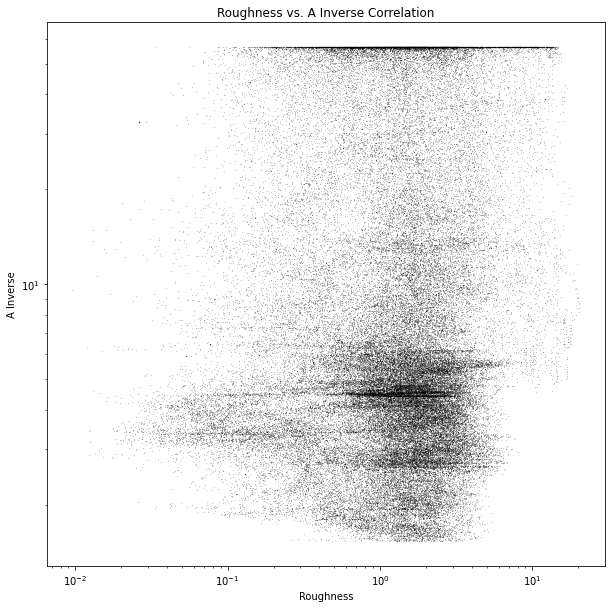

In [115]:
#bounding roughness and inverse data to the pig shapefile

fig, ax = plt.subplots(figsize=(10,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

roughness = []
inverse = []
easting = []
northing = []

#plotting for each atl06 line
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    roughness.append(r)
    inverse.append(a)
    easting.append(x)
    northing.append(y)
    points = ax.scatter(r,a,c='k',s=.01,alpha=.8)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Roughness vs. A Inverse Correlation')
ax.set_xlabel('Roughness')
ax.set_ylabel('A Inverse')
plt.show()

100%|██████████| 847/847 [01:18<00:00, 10.78it/s]


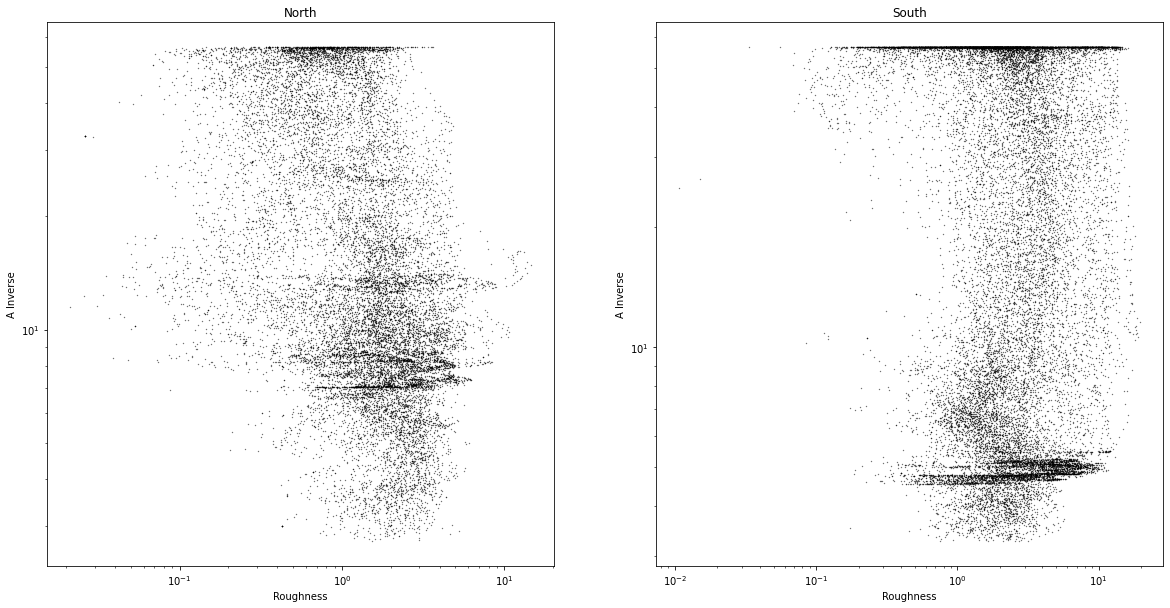

In [114]:
#plotting with bounds for shear margins

fig, ax = plt.subplots(1,2,figsize=(20,10))

north_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/pig_north_shear (5).shp'
north_shape = gpd.read_file(north_outline_path)
north_shape = north_shape.to_crs(3031)

south_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/pig_south_shear (3).shp'
south_shape = gpd.read_file(south_outline_path)
south_shape = south_shape.to_crs(3031)

for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_north = []
    on_south = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_north = north_shape.contains(Point(x[k],y[k]))
        on_north.append(pts_on_north.values[0])
        pts_on_south = south_shape.contains(Point(x[k],y[k]))
        on_south.append(pts_on_south.values[0])
    on_north = np.array(on_north)
    on_south = np.array(on_south)
    x_north = x[on_north==True]
    y_north = y[on_north==True]
    r_north = r[on_north==True]
    a_north = a[on_north == True]
    x_south = x[on_south==True]
    y_south = y[on_south==True]
    r_south = r[on_south==True]
    a_south = a[on_south == True]
    points_north = ax[0].scatter(r_north, a_north, c='k', s=.1, alpha=.8)
    points_south = ax[1].scatter(r_south, a_south, c='k', s=.1, alpha=.8)
    
#NEED TO BOUND TO PIG MASK!!!!!!!!!!!!!!!!!!!

ax[0].set_title('North')
ax[1].set_title('South')
ax[0].set_xlabel('Roughness')
ax[0].set_ylabel('A Inverse')
ax[1].set_xlabel('Roughness')
ax[1].set_ylabel('A Inverse')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.show()

100%|██████████| 847/847 [00:50<00:00, 16.67it/s]


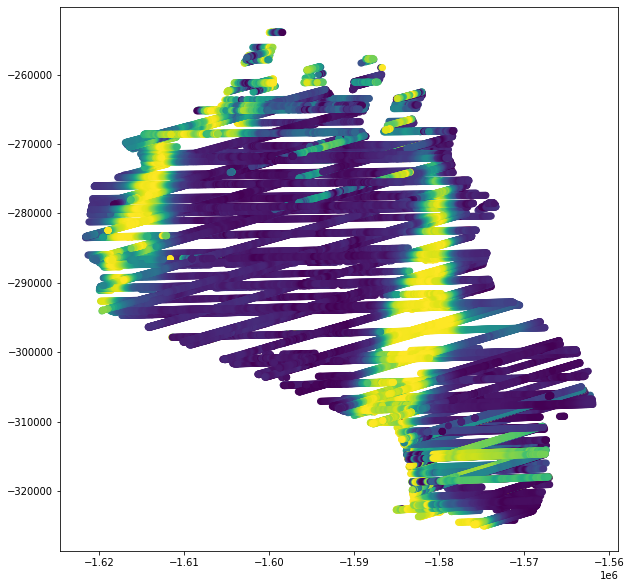

In [98]:
#plotting difference between r and a

fig, ax = plt.subplots(figsize=(10,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

roughness = []
inverse = []
easting = []
northing = []
difference = []

#plotting difference of a and r spatially
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    a_norm = a/np.max(a.values)
    r_norm 
    diff = a-r
    roughness.append(r)
    inverse.append(a)
    easting.append(x)
    northing.append(y)
    difference.append(diff)
    points = ax.scatter(x,y,c=diff)

ERROR! Session/line number was not unique in database. History logging moved to new session 192


100%|██████████| 847/847 [00:52<00:00, 16.20it/s]


(-341000.0, -250000.0)

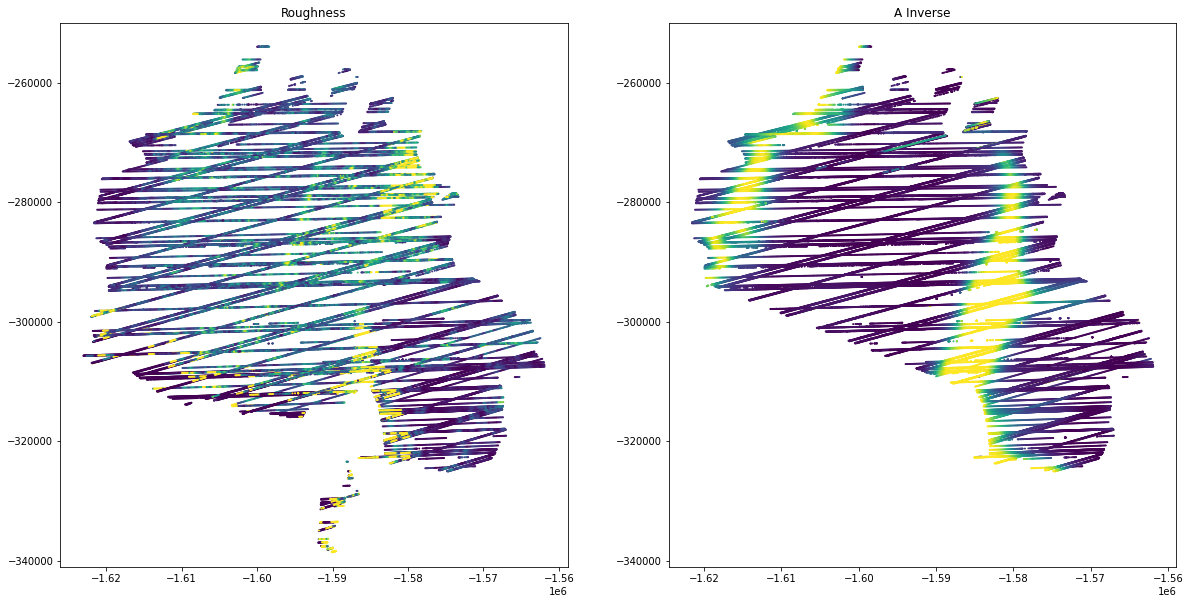

In [111]:
#plotting r and a spatially side by side

fig, ax = plt.subplots(1,2,figsize=(20,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

#plotting
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    points = ax[0].scatter(x,y,c=r,s=.9,vmin=0, vmax=6)
    points2 = ax[1].scatter(x,y,c=a,s=.9)
    
ax[0].set_title('Roughness')
ax[1].set_title('A Inverse')
ax[0].set_ylim(-341000,-250000)
ax[1].set_ylim(-341000,-250000)

100%|██████████| 847/847 [00:52<00:00, 16.09it/s]


(-341000.0, -250000.0)

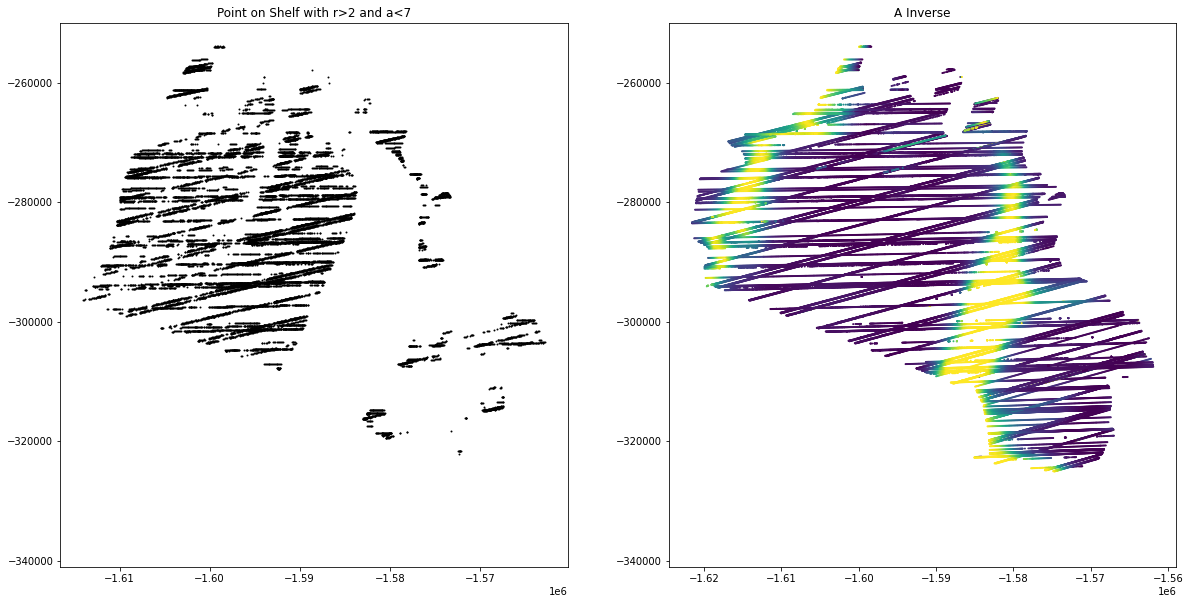

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

#plotting all points on shelf within certain a and r bounds
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    x_bounded = []
    y_bounded = []
    for l in range(len(r)):
        if r[l]<1 or a[l]>7 or np.isnan(r[l])==True or np.isnan(a[l])==True:
            x_bounded.append(float('nan'))
            y_bounded.append(float('nan'))
        else:
            x_bounded.append(x[l])
            y_bounded.append(y[l])
    points = ax[0].scatter(x_bounded,y_bounded,c='k',s=.9,vmin=0, vmax=6)
    points2 = ax[1].scatter(x,y,c=a,s=.9)

ax[0].set_title('Point on Shelf with r>2 and a<7')
ax[1].set_title('A Inverse')
ax[0].set_ylim(-341000,-250000)
ax[1].set_ylim(-341000,-250000)

100%|██████████| 847/847 [00:52<00:00, 16.12it/s]


(-341000.0, -250000.0)

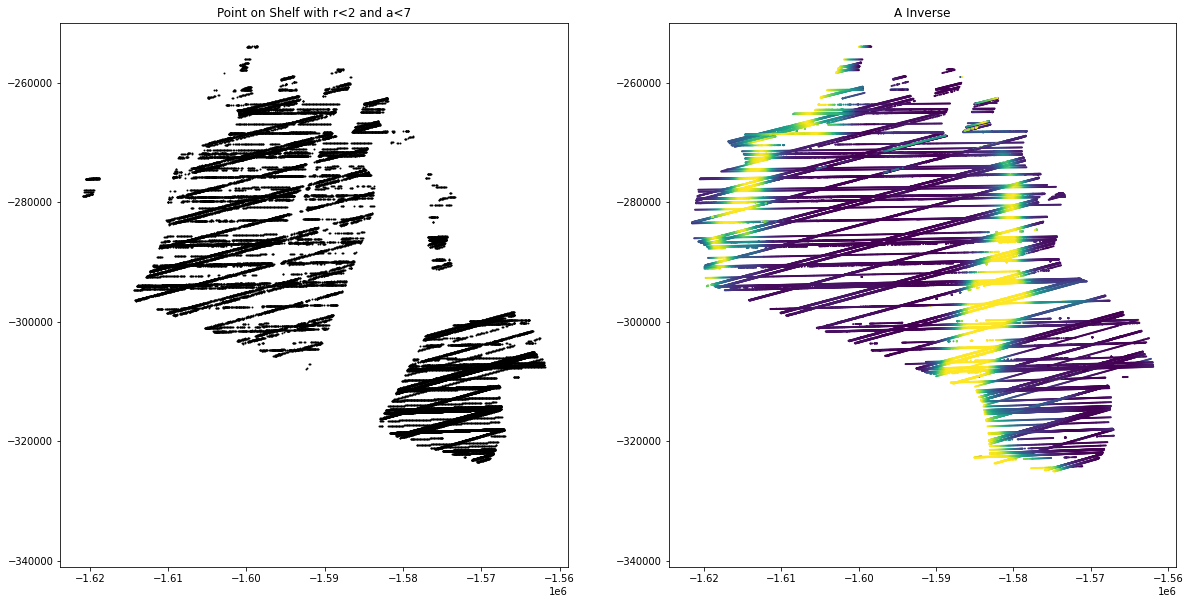

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

#plotting all points on shelf within certain a and r bounds
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    x_bounded = []
    y_bounded = []
    for l in range(len(r)):
        if r[l]>1 or a[l]>7 or np.isnan(r[l])==True or np.isnan(a[l])==True:
            x_bounded.append(float('nan'))
            y_bounded.append(float('nan'))
        else:
            x_bounded.append(x[l])
            y_bounded.append(y[l])
    points = ax[0].scatter(x_bounded,y_bounded,c='k',s=.9,vmin=0, vmax=6)
    points2 = ax[1].scatter(x,y,c=a,s=.9)

ax[0].set_title('Point on Shelf with r<2 and a<7')
ax[1].set_title('A Inverse')
ax[0].set_ylim(-341000,-250000)
ax[1].set_ylim(-341000,-250000)

100%|██████████| 847/847 [00:52<00:00, 16.16it/s]


(-341000.0, -250000.0)

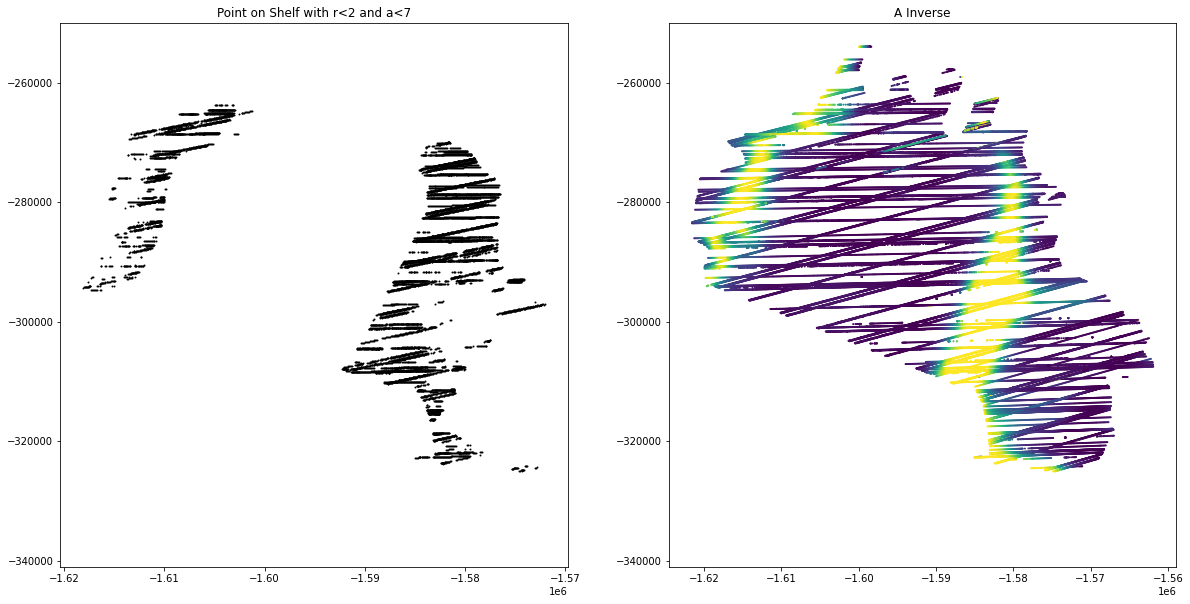

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

#plotting all points on shelf within certain a and r bounds
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    x_bounded = []
    y_bounded = []
    for l in range(len(r)):
        if r[l]<1 or a[l]<7 or np.isnan(r[l])==True or np.isnan(a[l])==True:
            x_bounded.append(float('nan'))
            y_bounded.append(float('nan'))
        else:
            x_bounded.append(x[l])
            y_bounded.append(y[l])
    points = ax[0].scatter(x_bounded,y_bounded,c='k',s=.9,vmin=0, vmax=6)
    points2 = ax[1].scatter(x,y,c=a,s=.9)

ax[0].set_title('Point on Shelf with r<2 and a<7')
ax[1].set_title('A Inverse')
ax[0].set_ylim(-341000,-250000)
ax[1].set_ylim(-341000,-250000)

100%|██████████| 847/847 [00:52<00:00, 16.27it/s]


(-341000.0, -250000.0)

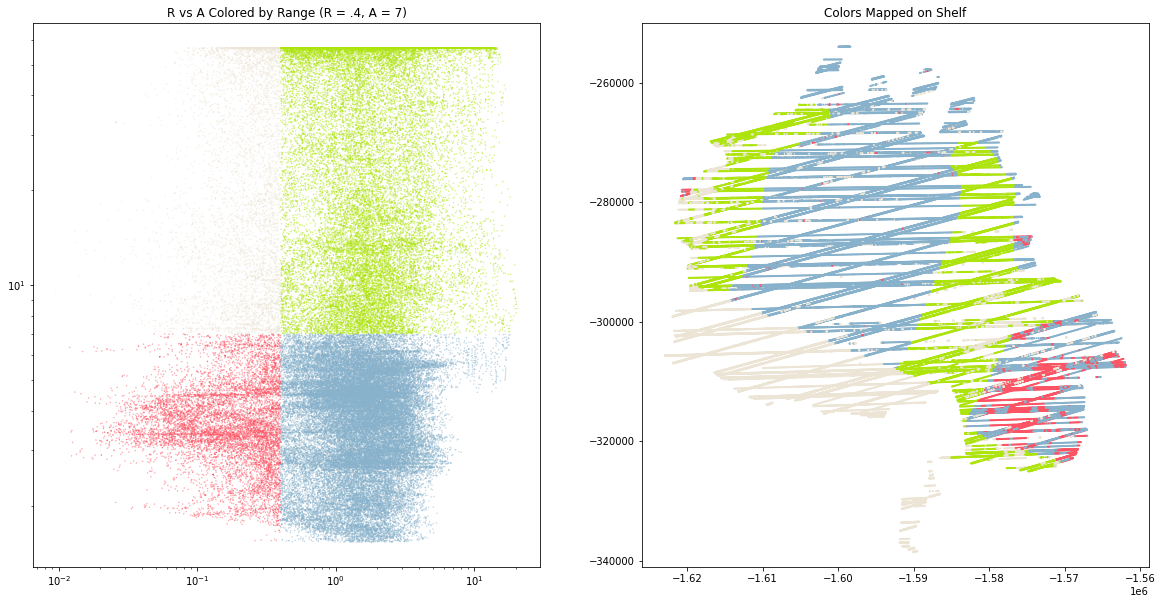

In [37]:
#attempting to plot each r-a range as a separate color and their respective mapping to the ice shelf

fig, ax = plt.subplots(1,2,figsize=(20,10))

study_shelf_id = 590802
all_shelf_outline_path = '/home/acdealy/notebooks/ice-shelf-roughness/shapefiles/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id] 

#plotting all points on shelf within certain a and r bounds
for j in tqdm.trange(np.shape(pig_data)[0]):
    x = np.array(pig_data['E'].iloc[j])
    y = np.array(pig_data['N'].iloc[j])
    r = np.array(pig_data['R'].iloc[j])
    a = np.array(pig_data['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(pig_data['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    colors = np.full(len(a), '#ECE4D4', dtype='U10')
    colors[(r < .4) & (a < 7)] = '#FC5464'
    colors[(r > .4) & (a < 7)] = '#88B2CC'
    colors[(r > .4) & (a > 7)] = '#ACE40C'
    points = ax[1].scatter(x,y,c=colors,s=.9,vmin=0, vmax=6)
    points2 = ax[0].scatter(r, a, c=colors, s=.1, alpha=.8)

ax[0].set_title('R vs A Colored by Range (R = .4, A = 7)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_title('Colors Mapped on Shelf')
ax[1].set_ylim(-341000,-250000)